In [1]:
import sklearn as skl
import pickle as pkl
import pandas as pd
import numpy as np

import sklearn.model_selection
import sklearn.svm
import sklearn.metrics

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
import seaborn as sns

from itertools import chain

In [2]:
import scipy as sp

In [3]:
import math
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data

In [4]:
import sys
sys.path.append("..") # or wherever the package is
import kuanglu

In [5]:
import scanpy as sc

In [50]:
import pickle as pkl

In [6]:
import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "4"

## Create dataloaders

Note: samples must have the same number of genes (and of course in the same order). They can, however, have different number of cells, but you'll only be able to use `batch_size = 1`, because we matrices with different sizes cannot form a tensor.

It is possible in the future, by flanking them with zeros and carefully masking them out in several steps.

In [7]:
adata = sc.read_h5ad('data/demo1_sp_adata.h5ad')

train_Xs = []
chosen_slices = ['MsBrainAgingSpatialDonor_5_0', 'MsBrainAgingSpatialDonor_6_0', 
                 'MsBrainAgingSpatialDonor_7_0']
for i in chosen_slices:
    train_Xs.append(np.array(adata.X[adata.obs['donor_slice'] == i, :]))
    
validate_Xs = []
chosen_donors = ['MsBrainAgingSpatialDonor_8_0']
for i in chosen_donors:
    validate_Xs.append(np.array(adata.X[adata.obs['donor_slice'] == i, :]))
    
_, p = train_Xs[0].shape

class MyDataSet(Data.Dataset):
    def __init__(self, Xs):
        super(MyDataSet, self).__init__()
        self.Xs = [torch.Tensor(X) for X in Xs]
        
    def __len__(self):
        return len(self.Xs)

    def __getitem__(self, idx):
        return self.Xs[idx]

train_data = MyDataSet(train_Xs)
train_loader = Data.DataLoader(train_data, batch_size=1, shuffle=True) 

print("Training data dimensions:")
for i in train_Xs:
    print(i.shape)

validate_data = MyDataSet(validate_Xs)
validate_loader = Data.DataLoader(validate_data, batch_size=1, shuffle=True)

print("Validation data dimensions:")
for i in validate_Xs:
    print(i.shape)

Training data dimensions:
(5000, 374)
(5000, 374)
(5000, 374)
Validation data dimensions:
(5000, 374)


In [8]:
model = kuanglu.Model(d_gene=p, 
                      d_denoise = [p], 
                      d_embed=[512, 256, 128], 
                      d_quality=[512, 256, 1], 
                      n_heads=1,
                      lbd=1.).to('cuda')

In [9]:
rec = model.fit('denoised', train_loader, validate_loader, [0, 500],
                fix=['embed', 'qualify', 'smooth', 'interact'], lr=1e-4)

Epoch 0001 Train MSE 692.599 Validate MSE 1.037 Raw MSE 1.006
Epoch 0002 Train MSE 692.611 Validate MSE 1.018 Raw MSE 0.980
Epoch 0003 Train MSE 692.605 Validate MSE 1.105 Raw MSE 1.076
Epoch 0004 Train MSE 692.595 Validate MSE 1.038 Raw MSE 1.012
Epoch 0005 Train MSE 692.592 Validate MSE 1.060 Raw MSE 1.029
Epoch 0006 Train MSE 692.606 Validate MSE 1.080 Raw MSE 1.051
Epoch 0007 Train MSE 692.588 Validate MSE 1.029 Raw MSE 1.002
Epoch 0008 Train MSE 692.591 Validate MSE 1.058 Raw MSE 1.030
Epoch 0009 Train MSE 692.598 Validate MSE 1.057 Raw MSE 1.032
Epoch 0010 Train MSE 692.591 Validate MSE 1.032 Raw MSE 1.009
Epoch 0011 Train MSE 692.580 Validate MSE 1.015 Raw MSE 0.992
Epoch 0012 Train MSE 692.595 Validate MSE 1.013 Raw MSE 0.992
Epoch 0013 Train MSE 692.571 Validate MSE 0.992 Raw MSE 0.973
Epoch 0014 Train MSE 692.584 Validate MSE 1.029 Raw MSE 1.009
Epoch 0015 Train MSE 692.596 Validate MSE 1.024 Raw MSE 1.009
Epoch 0016 Train MSE 692.581 Validate MSE 1.056 Raw MSE 1.041
Epoch 00

Epoch 0137 Train MSE 692.465 Validate MSE 0.937 Raw MSE 1.018
Epoch 0138 Train MSE 692.476 Validate MSE 0.926 Raw MSE 1.004
Epoch 0139 Train MSE 692.475 Validate MSE 0.925 Raw MSE 1.007
Epoch 0140 Train MSE 692.456 Validate MSE 0.932 Raw MSE 1.013
Epoch 0141 Train MSE 692.466 Validate MSE 0.928 Raw MSE 1.002
Epoch 0142 Train MSE 692.470 Validate MSE 0.938 Raw MSE 1.012
Epoch 0143 Train MSE 692.455 Validate MSE 0.914 Raw MSE 0.995
Epoch 0144 Train MSE 692.465 Validate MSE 0.959 Raw MSE 1.037
Epoch 0145 Train MSE 692.457 Validate MSE 0.923 Raw MSE 0.999
Epoch 0146 Train MSE 692.461 Validate MSE 0.936 Raw MSE 1.020
Epoch 0147 Train MSE 692.469 Validate MSE 0.928 Raw MSE 1.000
Epoch 0148 Train MSE 692.460 Validate MSE 0.921 Raw MSE 1.000
Epoch 0149 Train MSE 692.480 Validate MSE 0.931 Raw MSE 1.022
Epoch 0150 Train MSE 692.482 Validate MSE 0.911 Raw MSE 0.992
Epoch 0151 Train MSE 692.449 Validate MSE 0.931 Raw MSE 1.011
Epoch 0152 Train MSE 692.462 Validate MSE 0.899 Raw MSE 0.960
Epoch 01

Epoch 0271 Train MSE 692.455 Validate MSE 0.932 Raw MSE 1.011
Epoch 0272 Train MSE 692.450 Validate MSE 0.926 Raw MSE 1.019
Epoch 0273 Train MSE 692.439 Validate MSE 0.911 Raw MSE 1.018
Epoch 0274 Train MSE 692.442 Validate MSE 0.914 Raw MSE 0.993
Epoch 0275 Train MSE 692.428 Validate MSE 0.950 Raw MSE 1.036
Epoch 0276 Train MSE 692.438 Validate MSE 0.963 Raw MSE 1.063
Epoch 0277 Train MSE 692.458 Validate MSE 0.922 Raw MSE 1.015
Epoch 0278 Train MSE 692.436 Validate MSE 0.942 Raw MSE 1.034
Epoch 0279 Train MSE 692.438 Validate MSE 0.897 Raw MSE 0.971
Epoch 0280 Train MSE 692.452 Validate MSE 0.925 Raw MSE 1.013
Epoch 0281 Train MSE 692.442 Validate MSE 0.933 Raw MSE 1.027
Epoch 0282 Train MSE 692.442 Validate MSE 0.909 Raw MSE 0.991
Epoch 0283 Train MSE 692.446 Validate MSE 0.916 Raw MSE 1.013
Epoch 0284 Train MSE 692.418 Validate MSE 0.917 Raw MSE 1.005
Epoch 0285 Train MSE 692.456 Validate MSE 0.941 Raw MSE 1.022
Epoch 0286 Train MSE 692.431 Validate MSE 0.918 Raw MSE 1.001
Epoch 02

Epoch 0404 Train MSE 692.446 Validate MSE 0.938 Raw MSE 1.025
Epoch 0405 Train MSE 692.450 Validate MSE 0.896 Raw MSE 0.987
Epoch 0406 Train MSE 692.444 Validate MSE 0.927 Raw MSE 1.017
Epoch 0407 Train MSE 692.432 Validate MSE 0.903 Raw MSE 1.002
Epoch 0408 Train MSE 692.441 Validate MSE 0.915 Raw MSE 1.009
Epoch 0409 Train MSE 692.447 Validate MSE 0.898 Raw MSE 0.981
Epoch 0410 Train MSE 692.448 Validate MSE 0.940 Raw MSE 1.029
Epoch 0411 Train MSE 692.436 Validate MSE 0.892 Raw MSE 0.990
Epoch 0412 Train MSE 692.437 Validate MSE 0.921 Raw MSE 1.000
Epoch 0413 Train MSE 692.444 Validate MSE 0.940 Raw MSE 1.038
Epoch 0414 Train MSE 692.416 Validate MSE 0.908 Raw MSE 0.994
Epoch 0415 Train MSE 692.436 Validate MSE 0.939 Raw MSE 1.036
Epoch 0416 Train MSE 692.447 Validate MSE 0.937 Raw MSE 1.038
Epoch 0417 Train MSE 692.439 Validate MSE 0.937 Raw MSE 1.028
Epoch 0418 Train MSE 692.447 Validate MSE 0.928 Raw MSE 1.037
Epoch 0419 Train MSE 692.435 Validate MSE 0.916 Raw MSE 1.013
Epoch 04

In [10]:
rec = kuanglu.record_concat(rec, model.fit('smoothed', train_loader, validate_loader, [500, 750],
                                           fix=['denoise', 'interact'], lr=1e-4))
rec = kuanglu.record_concat(rec, model.fit('smoothed', train_loader, validate_loader, [750, 1000],
                                           fix=['interact'], lr=1e-4))

Epoch 0501 Train MSE 692.543 Validate MSE 0.980 Raw MSE 1.006
Epoch 0502 Train MSE 692.537 Validate MSE 1.032 Raw MSE 1.066
Epoch 0503 Train MSE 692.524 Validate MSE 0.986 Raw MSE 1.027
Epoch 0504 Train MSE 692.518 Validate MSE 0.924 Raw MSE 0.962
Epoch 0505 Train MSE 692.529 Validate MSE 0.977 Raw MSE 1.032
Epoch 0506 Train MSE 692.536 Validate MSE 0.952 Raw MSE 1.012
Epoch 0507 Train MSE 692.509 Validate MSE 0.944 Raw MSE 1.006
Epoch 0508 Train MSE 692.503 Validate MSE 0.917 Raw MSE 0.974
Epoch 0509 Train MSE 692.495 Validate MSE 0.913 Raw MSE 0.982
Epoch 0510 Train MSE 692.487 Validate MSE 0.922 Raw MSE 0.986
Epoch 0511 Train MSE 692.492 Validate MSE 0.943 Raw MSE 1.012
Epoch 0512 Train MSE 692.480 Validate MSE 0.927 Raw MSE 0.998
Epoch 0513 Train MSE 692.496 Validate MSE 0.925 Raw MSE 1.002
Epoch 0514 Train MSE 692.496 Validate MSE 0.972 Raw MSE 1.047
Epoch 0515 Train MSE 692.487 Validate MSE 0.909 Raw MSE 0.989
Epoch 0516 Train MSE 692.492 Validate MSE 0.929 Raw MSE 1.007
Epoch 05

Epoch 0636 Train MSE 692.446 Validate MSE 0.916 Raw MSE 1.029
Epoch 0637 Train MSE 692.429 Validate MSE 0.908 Raw MSE 1.038
Epoch 0638 Train MSE 692.438 Validate MSE 0.893 Raw MSE 1.019
Epoch 0639 Train MSE 692.442 Validate MSE 0.891 Raw MSE 1.015
Epoch 0640 Train MSE 692.434 Validate MSE 0.909 Raw MSE 1.020
Epoch 0641 Train MSE 692.424 Validate MSE 0.885 Raw MSE 1.007
Epoch 0642 Train MSE 692.442 Validate MSE 0.907 Raw MSE 1.007
Epoch 0643 Train MSE 692.443 Validate MSE 0.872 Raw MSE 1.000
Epoch 0644 Train MSE 692.459 Validate MSE 0.892 Raw MSE 0.998
Epoch 0645 Train MSE 692.436 Validate MSE 0.881 Raw MSE 1.008
Epoch 0646 Train MSE 692.421 Validate MSE 0.924 Raw MSE 1.033
Epoch 0647 Train MSE 692.439 Validate MSE 0.915 Raw MSE 1.032
Epoch 0648 Train MSE 692.421 Validate MSE 0.902 Raw MSE 1.023
Epoch 0649 Train MSE 692.419 Validate MSE 0.906 Raw MSE 1.031
Epoch 0650 Train MSE 692.436 Validate MSE 0.912 Raw MSE 1.036
Epoch 0651 Train MSE 692.427 Validate MSE 0.914 Raw MSE 1.029
Epoch 06

Epoch 0771 Train MSE 692.426 Validate MSE 0.873 Raw MSE 0.983
Epoch 0772 Train MSE 692.415 Validate MSE 0.905 Raw MSE 1.026
Epoch 0773 Train MSE 692.431 Validate MSE 0.917 Raw MSE 1.033
Epoch 0774 Train MSE 692.429 Validate MSE 0.887 Raw MSE 0.992
Epoch 0775 Train MSE 692.417 Validate MSE 0.895 Raw MSE 1.018
Epoch 0776 Train MSE 692.446 Validate MSE 0.917 Raw MSE 1.028
Epoch 0777 Train MSE 692.416 Validate MSE 0.916 Raw MSE 1.027
Epoch 0778 Train MSE 692.428 Validate MSE 0.877 Raw MSE 1.001
Epoch 0779 Train MSE 692.424 Validate MSE 0.924 Raw MSE 1.054
Epoch 0780 Train MSE 692.426 Validate MSE 0.908 Raw MSE 1.023
Epoch 0781 Train MSE 692.412 Validate MSE 0.897 Raw MSE 1.011
Epoch 0782 Train MSE 692.428 Validate MSE 0.920 Raw MSE 1.050
Epoch 0783 Train MSE 692.429 Validate MSE 0.882 Raw MSE 0.997
Epoch 0784 Train MSE 692.430 Validate MSE 0.890 Raw MSE 1.006
Epoch 0785 Train MSE 692.406 Validate MSE 0.886 Raw MSE 1.007
Epoch 0786 Train MSE 692.422 Validate MSE 0.901 Raw MSE 1.020
Epoch 07

Epoch 0906 Train MSE 692.422 Validate MSE 0.887 Raw MSE 1.029
Epoch 0907 Train MSE 692.414 Validate MSE 0.869 Raw MSE 1.008
Epoch 0908 Train MSE 692.419 Validate MSE 0.861 Raw MSE 0.994
Epoch 0909 Train MSE 692.432 Validate MSE 0.835 Raw MSE 0.964
Epoch 0910 Train MSE 692.440 Validate MSE 0.855 Raw MSE 1.007
Epoch 0911 Train MSE 692.427 Validate MSE 0.877 Raw MSE 1.031
Epoch 0912 Train MSE 692.408 Validate MSE 0.855 Raw MSE 0.977
Epoch 0913 Train MSE 692.424 Validate MSE 0.845 Raw MSE 0.996
Epoch 0914 Train MSE 692.407 Validate MSE 0.893 Raw MSE 1.037
Epoch 0915 Train MSE 692.424 Validate MSE 0.893 Raw MSE 1.024
Epoch 0916 Train MSE 692.415 Validate MSE 0.875 Raw MSE 1.002
Epoch 0917 Train MSE 692.402 Validate MSE 0.869 Raw MSE 0.995
Epoch 0918 Train MSE 692.414 Validate MSE 0.846 Raw MSE 0.981
Epoch 0919 Train MSE 692.409 Validate MSE 0.863 Raw MSE 1.001
Epoch 0920 Train MSE 692.411 Validate MSE 0.872 Raw MSE 1.019
Epoch 0921 Train MSE 692.410 Validate MSE 0.884 Raw MSE 1.018
Epoch 09

In [11]:
rec = kuanglu.record_concat(rec, model.fit('final', train_loader, validate_loader, [1000, 1250],
                                           fix=['denoise', 'embed', 'qualify', 'smooth'], lr=1e-4))
rec = kuanglu.record_concat(rec, model.fit('final', train_loader, validate_loader, [1250, 1500], lr=1e-4))

Epoch 1001 Train MSE 690.869 Validate MSE 0.923 Raw MSE 1.038
Epoch 1002 Train MSE 686.210 Validate MSE 0.866 Raw MSE 0.991
Epoch 1003 Train MSE 681.552 Validate MSE 0.890 Raw MSE 1.043
Epoch 1004 Train MSE 676.947 Validate MSE 0.877 Raw MSE 1.016
Epoch 1005 Train MSE 672.337 Validate MSE 0.888 Raw MSE 1.008
Epoch 1006 Train MSE 667.751 Validate MSE 0.902 Raw MSE 1.041
Epoch 1007 Train MSE 663.200 Validate MSE 0.898 Raw MSE 1.041
Epoch 1008 Train MSE 658.667 Validate MSE 0.888 Raw MSE 1.022
Epoch 1009 Train MSE 654.139 Validate MSE 0.902 Raw MSE 1.023
Epoch 1010 Train MSE 649.645 Validate MSE 0.893 Raw MSE 1.028
Epoch 1011 Train MSE 645.160 Validate MSE 0.874 Raw MSE 1.003
Epoch 1012 Train MSE 640.703 Validate MSE 0.898 Raw MSE 1.019
Epoch 1013 Train MSE 636.267 Validate MSE 0.870 Raw MSE 1.003
Epoch 1014 Train MSE 631.857 Validate MSE 0.920 Raw MSE 1.042
Epoch 1015 Train MSE 627.455 Validate MSE 0.906 Raw MSE 1.046
Epoch 1016 Train MSE 623.089 Validate MSE 0.858 Raw MSE 0.996
Epoch 10

Epoch 1134 Train MSE 243.863 Validate MSE 0.829 Raw MSE 0.966
Epoch 1135 Train MSE 241.699 Validate MSE 0.860 Raw MSE 1.014
Epoch 1136 Train MSE 239.555 Validate MSE 0.876 Raw MSE 1.024
Epoch 1137 Train MSE 237.448 Validate MSE 0.887 Raw MSE 1.024
Epoch 1138 Train MSE 235.313 Validate MSE 0.860 Raw MSE 0.988
Epoch 1139 Train MSE 233.238 Validate MSE 0.874 Raw MSE 1.025
Epoch 1140 Train MSE 231.163 Validate MSE 0.866 Raw MSE 1.011
Epoch 1141 Train MSE 229.117 Validate MSE 0.855 Raw MSE 1.010
Epoch 1142 Train MSE 227.059 Validate MSE 0.876 Raw MSE 1.026
Epoch 1143 Train MSE 225.025 Validate MSE 0.860 Raw MSE 1.021
Epoch 1144 Train MSE 223.011 Validate MSE 0.817 Raw MSE 0.975
Epoch 1145 Train MSE 221.010 Validate MSE 0.857 Raw MSE 0.994
Epoch 1146 Train MSE 219.026 Validate MSE 0.868 Raw MSE 1.011
Epoch 1147 Train MSE 217.049 Validate MSE 0.877 Raw MSE 1.012
Epoch 1148 Train MSE 215.110 Validate MSE 0.821 Raw MSE 0.977
Epoch 1149 Train MSE 213.157 Validate MSE 0.865 Raw MSE 1.014
Epoch 11

Epoch 1268 Train MSE 67.340 Validate MSE 0.892 Raw MSE 1.031
Epoch 1269 Train MSE 66.687 Validate MSE 0.882 Raw MSE 1.026
Epoch 1270 Train MSE 66.021 Validate MSE 0.861 Raw MSE 1.015
Epoch 1271 Train MSE 65.309 Validate MSE 0.853 Raw MSE 1.006
Epoch 1272 Train MSE 64.669 Validate MSE 0.857 Raw MSE 1.007
Epoch 1273 Train MSE 64.004 Validate MSE 0.847 Raw MSE 1.013
Epoch 1274 Train MSE 63.377 Validate MSE 0.872 Raw MSE 1.004
Epoch 1275 Train MSE 62.741 Validate MSE 0.841 Raw MSE 0.992
Epoch 1276 Train MSE 62.079 Validate MSE 0.844 Raw MSE 0.998
Epoch 1277 Train MSE 61.439 Validate MSE 0.857 Raw MSE 1.025
Epoch 1278 Train MSE 60.817 Validate MSE 0.856 Raw MSE 1.016
Epoch 1279 Train MSE 60.204 Validate MSE 0.847 Raw MSE 1.002
Epoch 1280 Train MSE 59.603 Validate MSE 0.879 Raw MSE 1.027
Epoch 1281 Train MSE 59.014 Validate MSE 0.857 Raw MSE 1.024
Epoch 1282 Train MSE 58.400 Validate MSE 0.832 Raw MSE 0.988
Epoch 1283 Train MSE 57.801 Validate MSE 0.883 Raw MSE 1.032
Epoch 1284 Train MSE 57.

Epoch 1403 Train MSE 17.132 Validate MSE 0.851 Raw MSE 1.007
Epoch 1404 Train MSE 16.928 Validate MSE 0.860 Raw MSE 1.003
Epoch 1405 Train MSE 16.796 Validate MSE 0.844 Raw MSE 1.002
Epoch 1406 Train MSE 16.641 Validate MSE 0.838 Raw MSE 1.008
Epoch 1407 Train MSE 16.506 Validate MSE 0.828 Raw MSE 0.992
Epoch 1408 Train MSE 16.307 Validate MSE 0.852 Raw MSE 1.012
Epoch 1409 Train MSE 16.126 Validate MSE 0.882 Raw MSE 1.020
Epoch 1410 Train MSE 15.983 Validate MSE 0.844 Raw MSE 1.003
Epoch 1411 Train MSE 15.838 Validate MSE 0.831 Raw MSE 0.992
Epoch 1412 Train MSE 15.674 Validate MSE 0.826 Raw MSE 0.996
Epoch 1413 Train MSE 15.539 Validate MSE 0.840 Raw MSE 1.000
Epoch 1414 Train MSE 15.395 Validate MSE 0.858 Raw MSE 1.011
Epoch 1415 Train MSE 15.223 Validate MSE 0.851 Raw MSE 1.019
Epoch 1416 Train MSE 15.069 Validate MSE 0.842 Raw MSE 1.011
Epoch 1417 Train MSE 14.938 Validate MSE 0.835 Raw MSE 0.990
Epoch 1418 Train MSE 14.813 Validate MSE 0.839 Raw MSE 0.996
Epoch 1419 Train MSE 14.

Text(0, 0.5, 'MSE')

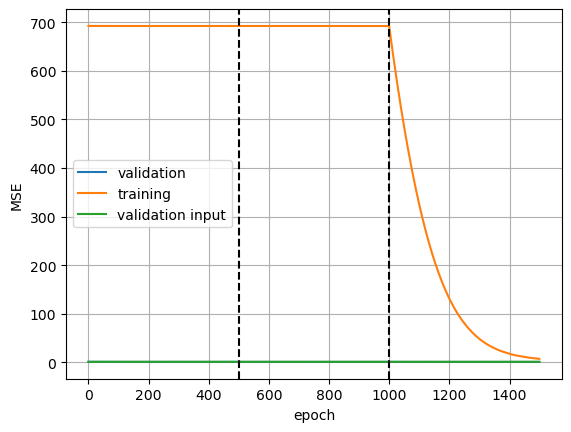

In [12]:
plt.plot(rec['validate_epoch'], rec['validate_mse'], label='validation')
plt.plot(rec['train_epoch'], rec['train_mse'], label='training')
plt.plot(rec['validate_epoch'], rec['raw_mse'], label='validation input')
plt.legend()
plt.grid()
plt.axvline(500, ls='--', c='k')
plt.axvline(1000, ls='--', c='k')
plt.xlabel('epoch')
plt.ylabel('MSE')

In [13]:
mse_df = pd.DataFrame({'epoch': rec['validate_epoch'], 'mse': rec['validate_mse']})

def epoch2stage(x):
    if x < 250: return 'pre-denoise'
    elif x < 500: return 'denoise'
    elif x < 750: return 'pre-denoise-smooth'
    elif x < 1000: return 'denoise-smooth'
    elif x < 1250: return 'pre-denoise-smooth-enhance'
    elif x < 1500: return 'denoise-smooth-enhance'
    else: raise NotImplementedError('x >= 400 not allowed')

mse_df['stage'] = mse_df['epoch'].apply(epoch2stage)
mse_df

,epoch,mse,stage
0,0,1.037158,pre-denoise
1,1,1.017804,pre-denoise
2,2,1.105275,pre-denoise
3,3,1.038204,pre-denoise
4,4,1.059581,pre-denoise
...,...,...,...
1495,1495,0.854921,denoise-smooth-enhance
1496,1496,0.834884,denoise-smooth-enhance
1497,1497,0.839038,denoise-smooth-enhance
1498,1498,0.834758,denoise-smooth-enhance


C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


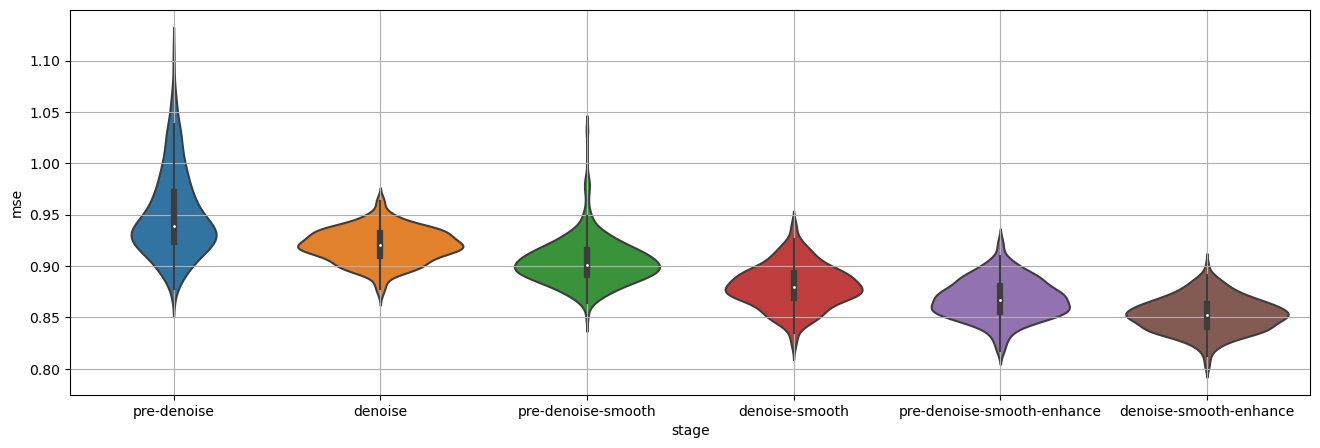

In [14]:
# sns.violinplot(mse_df[~mse_df['stage'].str.contains('pre-')], x='stage', y='mse')
plt.figure(figsize=(16, 5))
sns.violinplot(mse_df, x='stage', y='mse')
plt.grid()

In [15]:
u_stat, p_val = sp.stats.mannwhitneyu(mse_df.loc[mse_df['stage'] == 'denoise', 'mse'], 
                      mse_df.loc[mse_df['stage'] == 'denoise-smooth', 'mse'])

print('p =', p_val, 
      'f =', u_stat / sum(mse_df['stage'] == 'denoise') / sum(mse_df['stage'] == 'denoise-smooth'))

p = 5.415548105703891e-63 f = 0.9329919999999999


In [16]:
u_stat, p_val = sp.stats.mannwhitneyu(mse_df.loc[mse_df['stage'] == 'denoise-smooth', 'mse'], 
                      mse_df.loc[mse_df['stage'] == 'denoise-smooth-enhance', 'mse'])
print('p =', p_val, 
      'f =', u_stat / sum(mse_df['stage'] == 'denoise-smooth') / sum(mse_df['stage'] == 'denoise-smooth-enhance'))

p = 1.3434309598128803e-42 f = 0.853568


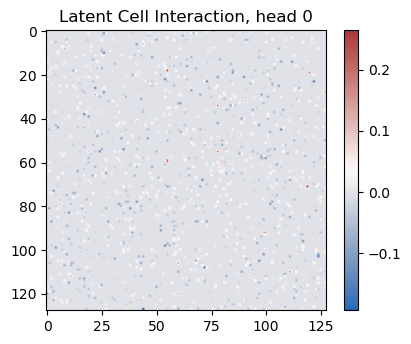

In [17]:
# Plot heatmap of the parameters in cell interaction module

weight_CIs = []
for head in range(len(model.cell_interacts)):
    weight_CIs.append(model.cell_interacts[head].transform.data)

plt.figure(figsize=(10, 8))
for i, weight_CI in enumerate(weight_CIs):
    weight_array = weight_CI.cpu().numpy()
    plt.subplot(2, 2, i + 1)
    plt.imshow(weight_array, cmap='vlag')
    plt.colorbar()
    plt.title(f'Latent Cell Interaction, head {i}')
plt.show()

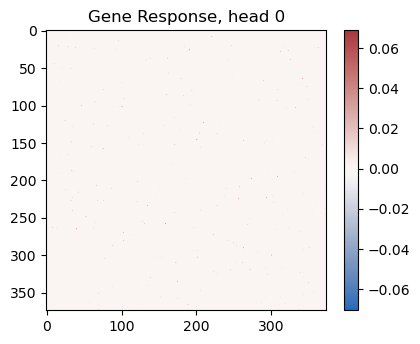

In [18]:
# Plot heatmap of the parameters in gene response module

weight_GRs = []
for head in range(len(model.cell_interacts)):
    weight_GRs.append(model.cell_interacts[head].gene_response.data)

plt.figure(figsize=(10, 8))
for i, weight_GR in enumerate(weight_GRs):
    weight_array = weight_GR.cpu().numpy()
    plt.subplot(2, 2, i + 1)
    plt.imshow(weight_array, cmap='vlag')
    plt.colorbar()
    plt.title(f'Gene Response, head {i}')
plt.show()

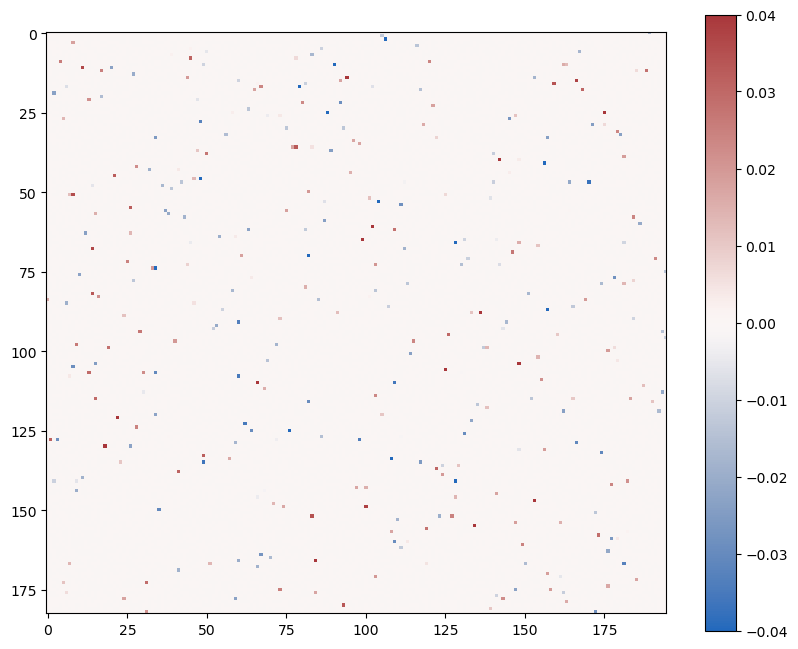

In [19]:
# Extract meaningful weights from Gene Response
THRESHOLD = 0.01

matGR = model.cell_interacts[0].gene_response.data.cpu().numpy()
col_max = np.max(np.abs(matGR), axis=0)
row_max = np.max(np.abs(matGR), axis=1)

meaningfulCols = np.where(col_max > THRESHOLD)[0]
meaningfulRows = np.where(row_max > THRESHOLD)[0]

meaningfulMatGR = matGR[meaningfulRows, :][:, meaningfulCols]

# meaningfulMatGR = np.clip(meaningfulMatGR, -.04, .04)

plt.figure(figsize=(10, 8))
plt.imshow(meaningfulMatGR, cmap='vlag', vmin=-.04, vmax=.04)
plt.colorbar()

In [20]:
# Find the indices of highest absolute values in the meaningfulMatGR

topK = 10
topK_indices = np.argsort(np.abs(matGR), axis=None)[-topK:]

topK_indices = np.unravel_index(topK_indices, matGR.shape)

topK_indices

(array([ 64, 225, 335,  26, 195, 258, 300, 146, 265, 102], dtype=int64),
 array([342, 257, 175, 191, 309, 159, 301, 201,  40, 101], dtype=int64))

In [21]:
np.abs(matGR)[topK_indices]

array([0.0520901 , 0.0542075 , 0.05479916, 0.05536044, 0.05630894,
       0.05688418, 0.05902192, 0.06090232, 0.06883495, 0.07040901],
      dtype=float32)

In [22]:
# check the corresponding genes

LR_pairs = []

for i in range(topK):
    LR_pairs.append((adata.var.index[topK_indices[1][i]], 
                     adata.var.index[topK_indices[0][i]]))

LR_pairs

[('ENSMUSG00000002985', 'ENSMUSG00000032259'),
 ('ENSMUSG00000003746', 'ENSMUSG00000040624'),
 ('ENSMUSG00000030500', 'ENSMUSG00000028362'),
 ('ENSMUSG00000035033', 'ENSMUSG00000030724'),
 ('ENSMUSG00000015149', 'ENSMUSG00000039239'),
 ('ENSMUSG00000010175', 'ENSMUSG00000022263'),
 ('ENSMUSG00000005583', 'ENSMUSG00000024376'),
 ('ENSMUSG00000023992', 'ENSMUSG00000026826'),
 ('ENSMUSG00000037242', 'ENSMUSG00000037138'),
 ('ENSMUSG00000027776', 'ENSMUSG00000020383')]

In [23]:
import pandas as pd

lr_pairs = pd.read_csv('./mouse_lr_pair.csv')

lgID = lr_pairs['ligand_ensembl_gene_id']
rpID = lr_pairs['receptor_ensembl_gene_id']

lrID = pd.concat([lgID, rpID], axis=1)
# lrID

geneIDBank = set(adata.var.index)

# filter out the genes that are not in the dataset

lrID = lrID[lrID['ligand_ensembl_gene_id'].isin(geneIDBank) &
            lrID['receptor_ensembl_gene_id'].isin(geneIDBank)]
lrID

,ligand_ensembl_gene_id,receptor_ensembl_gene_id
26,ENSMUSG00000035385,ENSMUSG00000049103
50,ENSMUSG00000000869,ENSMUSG00000026770
52,ENSMUSG00000000869,ENSMUSG00000031304
275,ENSMUSG00000017344,ENSMUSG00000026768
323,ENSMUSG00000019772,ENSMUSG00000022206
334,ENSMUSG00000019997,ENSMUSG00000020122
339,ENSMUSG00000019997,ENSMUSG00000030786
467,ENSMUSG00000024164,ENSMUSG00000026616
469,ENSMUSG00000024164,ENSMUSG00000030724
470,ENSMUSG00000024164,ENSMUSG00000030786


Text(0, 0.5, 'Density')

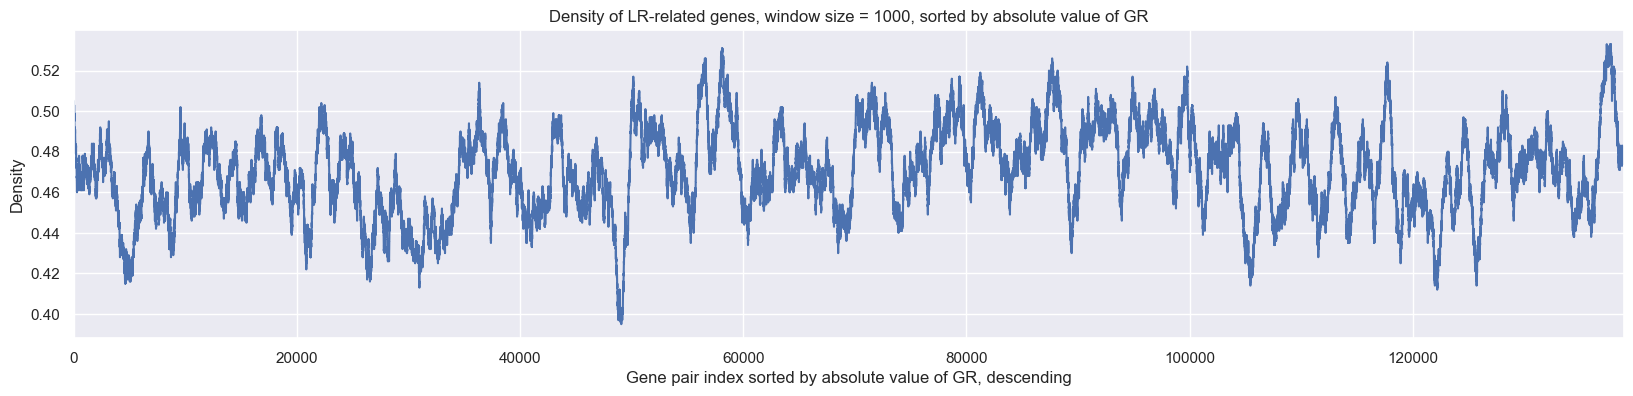

In [24]:
ranked_indices = np.argsort(np.abs(matGR), axis=None)
ranked_indices = np.unravel_index(ranked_indices, matGR.shape)

LR_related_genes = set(lgID) | set(rpID)

hasRelatedGenes = []

for indices in zip(ranked_indices[0], ranked_indices[1]):
    cnt = 0
    if adata.var.index[indices[0]] in LR_related_genes:
        cnt += 1
    if adata.var.index[indices[1]] in LR_related_genes:
        cnt += 1
    hasRelatedGenes.append(cnt)

hasRelatedGenes = np.array(hasRelatedGenes)

WINDOW_SIZE = 1000

density = []

for i in range(len(hasRelatedGenes) - WINDOW_SIZE):
    density.append(np.mean(hasRelatedGenes[i:i + WINDOW_SIZE]))

sns.set()
plt.figure(figsize=(20, 4))
plt.plot(density)
plt.title(f'Density of LR-related genes, window size = {WINDOW_SIZE}, sorted by absolute value of GR')
plt.xlim(0, len(hasRelatedGenes) - WINDOW_SIZE)
plt.xlabel('Gene pair index sorted by absolute value of GR, descending')
plt.ylabel('Density')

In [25]:
genesCol = adata.var_names[meaningfulCols]
genesRow = adata.var_names[meaningfulRows]

genesCol, genesRow

(Index(['ENSMUSG00000018381', 'ENSMUSG00000024411', 'ENSMUSG00000031375',
        'ENSMUSG00000036887', 'ENSMUSG00000045532', 'ENSMUSG00000073418',
        'ENSMUSG00000003657', 'ENSMUSG00000027559', 'ENSMUSG00000051439',
        'ENSMUSG00000030724',
        ...
        'ENSMUSG00000055415', 'ENSMUSG00000041959', 'ENSMUSG00000053007',
        'ENSMUSG00000045875', 'ENSMUSG00000040612', 'ENSMUSG00000038872',
        'ENSMUSG00000044647', 'ENSMUSG00000024238', 'ENSMUSG00000024501',
        'ENSMUSG00000025754'],
       dtype='object', length=195),
 Index(['ENSMUSG00000035783', 'ENSMUSG00000024397', 'ENSMUSG00000024411',
        'ENSMUSG00000060802', 'ENSMUSG00000048251', 'ENSMUSG00000031375',
        'ENSMUSG00000021835', 'ENSMUSG00000028487', 'ENSMUSG00000036887',
        'ENSMUSG00000003657',
        ...
        'ENSMUSG00000024610', 'ENSMUSG00000031997', 'ENSMUSG00000023868',
        'ENSMUSG00000041959', 'ENSMUSG00000028370', 'ENSMUSG00000045875',
        'ENSMUSG00000040612', 'ENSM

In [26]:
meaningfulMatGR.shape

(183, 195)

([<matplotlib.axis.YTick at 0x2274380a310>,
 [Text(0, 0, 'ENSMUSG00000025221'),
  Text(0, 1, 'ENSMUSG00000041741'),
  Text(0, 2, 'ENSMUSG00000023206'),
  Text(0, 3, 'ENSMUSG00000042751'),
  Text(0, 4, 'ENSMUSG00000070880'),
  Text(0, 5, 'ENSMUSG00000054509'),
  Text(0, 6, 'ENSMUSG00000057738'),
  Text(0, 7, 'ENSMUSG00000051980'),
  Text(0, 8, 'ENSMUSG00000074896'),
  Text(0, 9, 'ENSMUSG00000021835')])

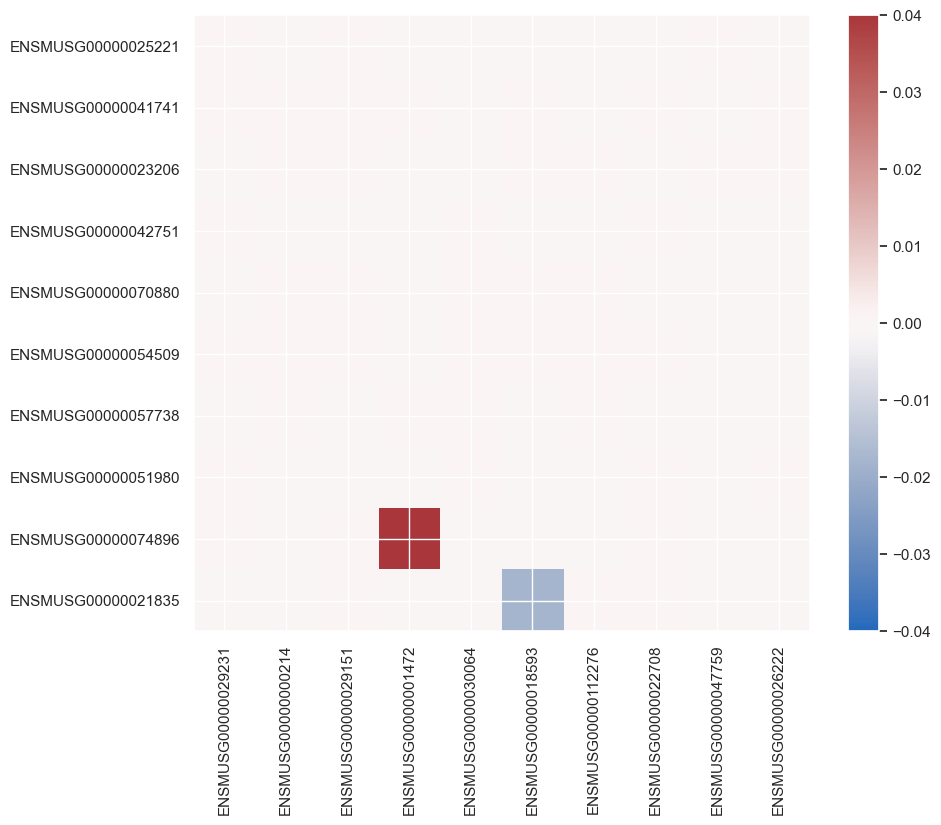

In [27]:
# take out a random patch

PATCH_SIZE = 10

idxCol = np.random.choice(meaningfulMatGR.shape[1], size=PATCH_SIZE, replace=False)
idxRow = np.random.choice(meaningfulMatGR.shape[0], size=PATCH_SIZE, replace=False)

patchMatGR = meaningfulMatGR[idxRow, :][:, idxCol]
patchGeneCol = genesCol[idxCol]
patchGeneRow = genesRow[idxRow]

plt.figure(figsize=(10, 8))
plt.imshow(patchMatGR, cmap='vlag', vmin=-.04, vmax=.04)
plt.colorbar()
plt.xticks(range(PATCH_SIZE), patchGeneCol, rotation=90)
plt.yticks(range(PATCH_SIZE), patchGeneRow)

In [28]:
# # take out a random column

# randColIdx = np.random.choice(meaningfulMatGR.shape[1], size=1, replace=False)
# randCol = meaningfulMatGR[:, randColIdx]
# randGene = genesCol[randColIdx]
# meaningfulY = np.abs(randCol) > THRESHOLD

# randCol = randCol[meaningfulY]

# randGene = randGene[meaningfulY]

# plt.figure(figsize=(10, 8))
# plt.imshow(randCol, cmap='vlag', vmin=-.04, vmax=.04)
# plt.colorbar()
# plt.xticks(range(1), randGene, rotation=90)
# plt.yticks(range(meaningfulMatGR.shape[0]), genesRow)

In [46]:

chosen_slices = ['MsBrainAgingSpatialDonor_5_0', 'MsBrainAgingSpatialDonor_6_0', 
                 'MsBrainAgingSpatialDonor_7_0']

adata_train = adata[adata.obs['donor_slice'].isin(chosen_slices)]

embeddings = []
model.eval()

emb = np.zeros((len(adata_train), 128))

with torch.no_grad():
    for X in train_loader:
        for i in adata_train.obs['donor_slice'].unique():
            X = np.array(adata_train.X[adata_train.obs['donor_slice'] == i, :])
            y = adata_train.obs['donor_slice'] == i
            emb[y, :] = model.cell_embed(torch.tensor(X, dtype=torch.float32)[None, :, :].to('cuda')).cpu().detach().numpy()

C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [47]:
adata_train.obsm['X_kuanglu'] = emb

In [48]:
adata_train.obs['donor_slice'].unique()

['MsBrainAgingSpatialDonor_5_0', 'MsBrainAgingSpatialDonor_6_0', 'MsBrainAgingSpatialDonor_7_0']
Categories (3, object): ['MsBrainAgingSpatialDonor_5_0', 'MsBrainAgingSpatialDonor_6_0', 'MsBrainAgingSpatialDonor_7_0']

C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\torch_2.0.1\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:39

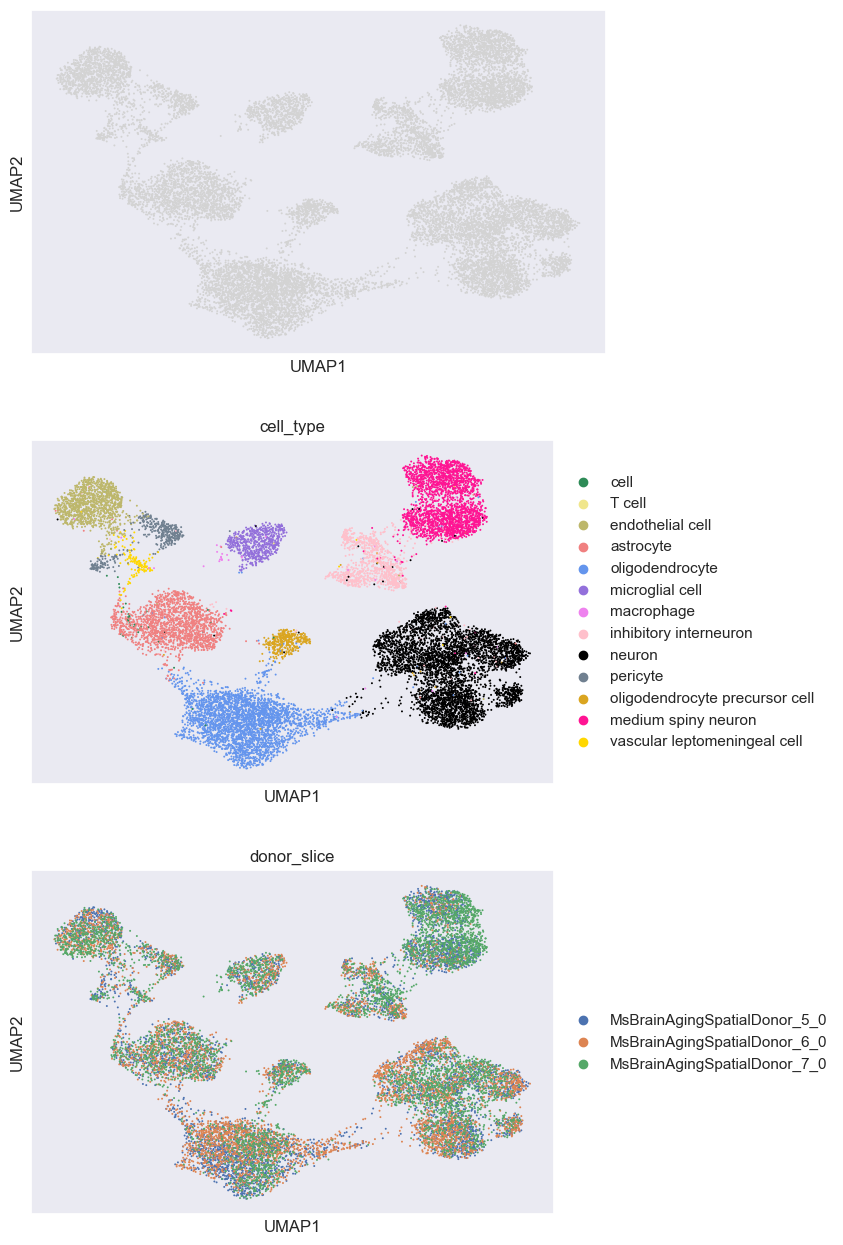

In [49]:
sc.pp.neighbors(adata_train, use_rep='X_kuanglu')
sc.tl.umap(adata_train)
sc.pl.umap(adata_train, color=[None, 'cell_type', 'donor_slice'], ncols=1)

In [51]:
with open("../comparisons/output/demo1-kuanglu-emb.pkl", 'wb') as f:
    pkl.dump(emb, f)